# 최단 경로 문제
- 최단 경로 알고리즘은 가장 짧은 경로를 찾는 알고리즘을 의미
- 다양한 문제 상황
    - 한 지점에서 다른 한 지점까지의 최단 경로
    - 한 지점에서 다른 모든 지점까지의 최단 경로
    - 모든 지점에서 다른 모든 지점까지의 최단 경로
- 각 지점은 그래프에서 노드로 표현
- 지점 간 연결된 도로는 그래프에서 간선으로 표현
- 이미 정해진 거리는 바뀌지 않는다

## 다익스트라 최단 경로 알고리즘
- 특정한 한 노드에서 출발하여 다른 모든 노드로 가는 최단 경로를 계산
    - 음의 간선이 없을 때 사용가능
    - 그리디 알고리즘으로 계산(매 상황에서 가장 비용이 적은 노드를 선택함)
    

### 동작 과정
1. 출발 노드를 설정
2. 최단 거리 테이블  초기화(가지 않은 노드는 무한대, 자기 자신은 0)
3. 방문하지 않은 노드 중에서 최단 거리가 가장 짧은 노드를 선택
4. 해당 노드를 거쳐 다른 노드로 가는 비용을 계사하여 최강 거리 테이블 갱신
5. 위 과정에서 3번과 4번을 반복



### 특징
   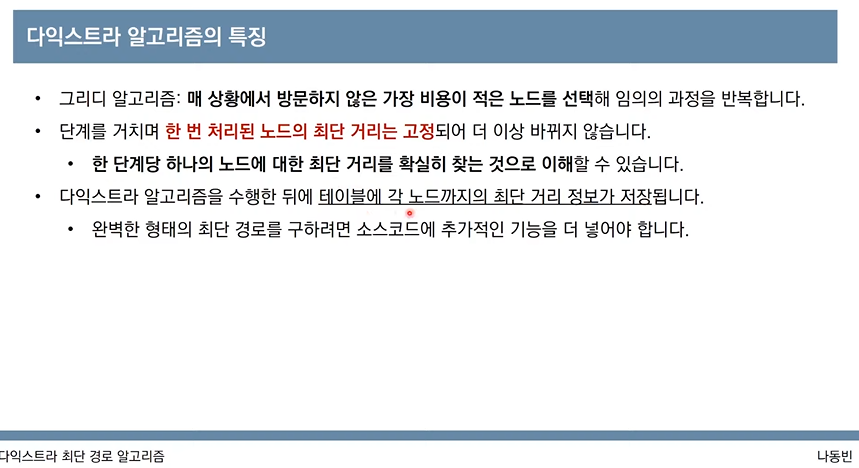

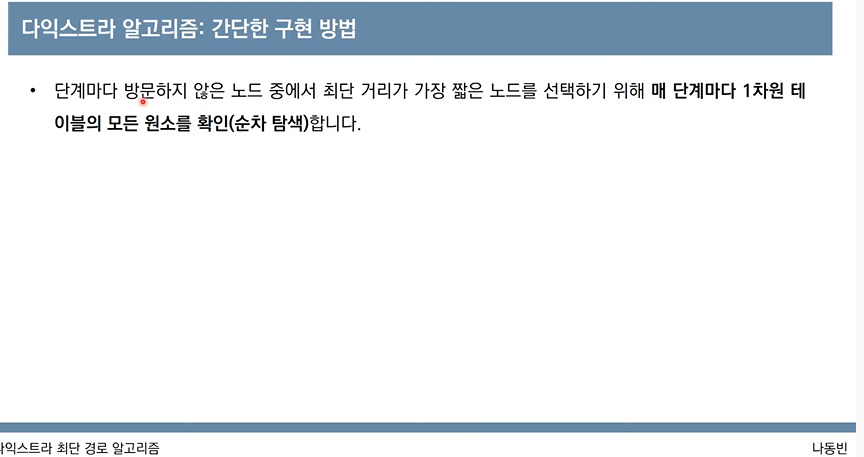

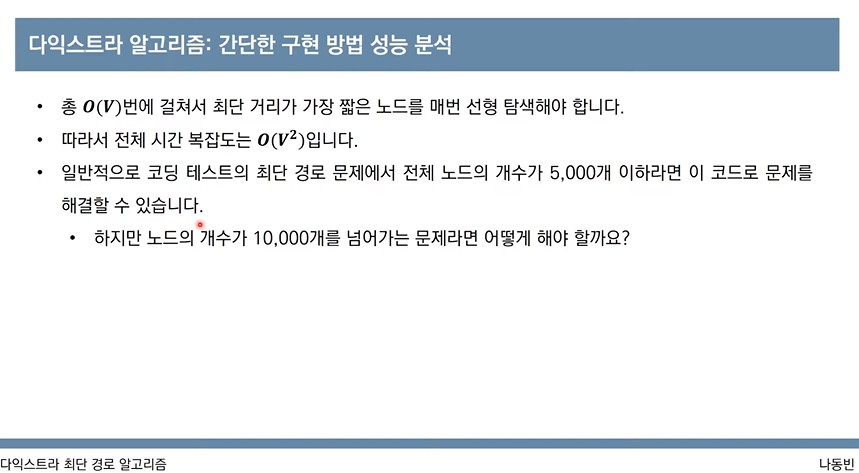

In [20]:
  
import sys
input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 방문한 적이 있는지 체크하는 목적의 리스트를 만들기
visited = [False] * (n + 1)
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

# 방문하지 않은 노드 중에서, 가장 최단 거리가 짧은 노드의 번호를 반환
def get_smallest_node():
    min_value = INF
    index = 0 # 가장 최단 거리가 짧은 노드(인덱스)
    for i in range(1, n + 1):
        if distance[i] < min_value and not visited[i]:
            min_value = distance[i]
            index = i
    return index

def dijkstra(start):
    # 시작 노드에 대해서 초기화
    distance[start] = 0
    visited[start] = True
    for j in graph[start]:
        distance[j[0]] = j[1]
    # 시작 노드를 제외한 전체 n - 1개의 노드에 대해 반복
    for i in range(n - 1):
        # 현재 최단 거리가 가장 짧은 노드를 꺼내서, 방문 처리
        now = get_smallest_node()
        visited[now] = True
        # 현재 노드와 연결된 다른 노드를 확인
        for j in graph[now]:
            cost = distance[now] + j[1]
            # 현재 노드를 거쳐서 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[j[0]]:
                distance[j[0]] = cost

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

ValueError: not enough values to unpack (expected 2, got 0)

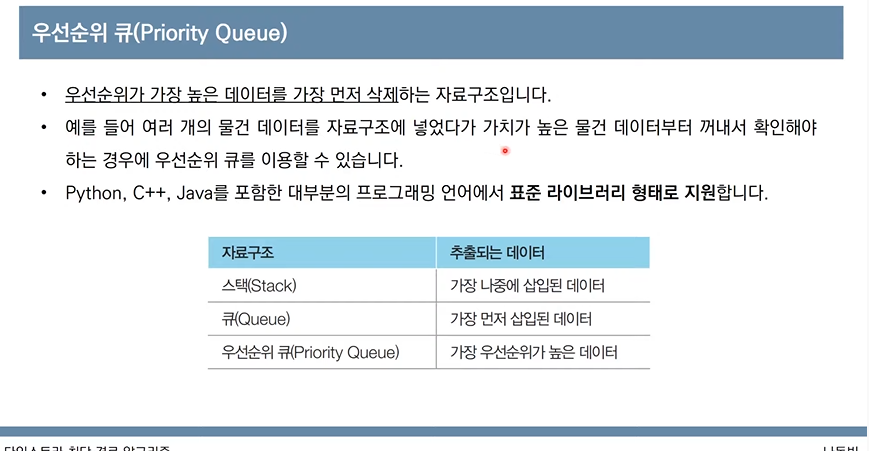

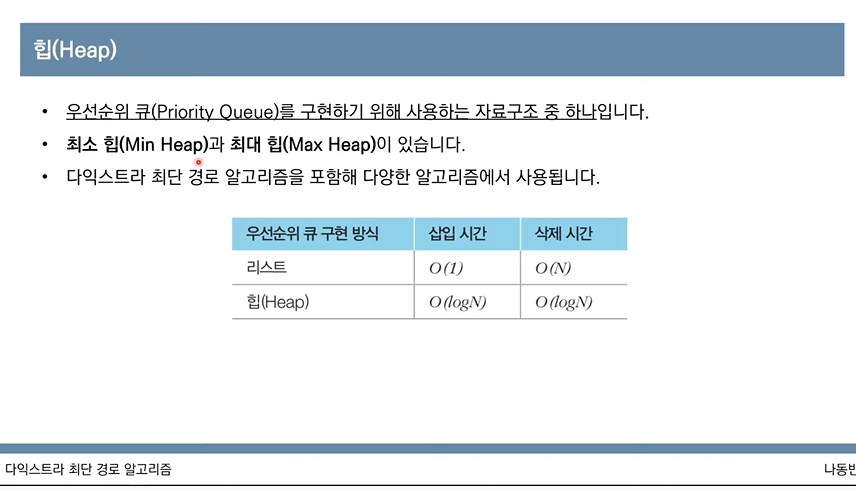

In [21]:
#최소 힙 - 시간복잡도는 O(NlogN)
import heapq

#오름차순 힙 정렬(Heap Sort)
def heapsort(iterable):
    h = []
    result =[]
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, value)
    # 힙에 삽입된 모든 원소를 차례대로 꺼내어 담기
    for i in range(len(h)):
        result.append(heapq.heappop(h))
    return result

result = heapsort([1,3,5, 7, 9, 2, 4, 6, 8, 0])
print(result)
        

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [22]:
#최대 힙 - 시간복잡도는 O(NlogN)
import heapq

#오름차순 힙 정렬(Heap Sort)
def heapsort(iterable):
    h = []
    result =[]
    # 모든 원소를 차례대로 힙에 삽입
    for value in iterable:
        heapq.heappush(h, -value)
    # 힙에 삽입된 모든 원소를 차례대로 꺼내어 담기
    for i in range(len(h)):
        result.append(-heapq.heappop(h))
    return result

result = heapsort([1,3,5, 7, 9, 2, 4, 6, 8, 0])
print(result)
        

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


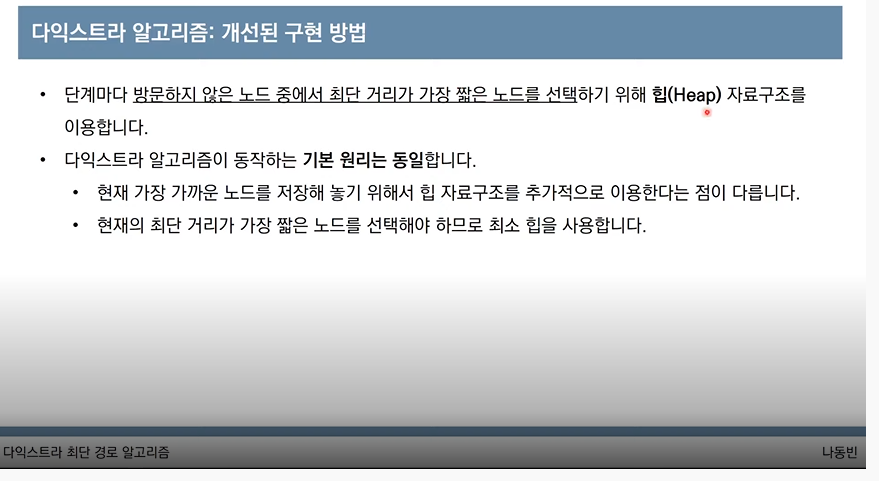

In [23]:
import heapq
import sys
input = sys.stdin.readline
INF = int(1e9) # 무한을 의미하는 값으로 10억을 설정

# 노드의 개수, 간선의 개수를 입력받기
n, m = map(int, input().split())
# 시작 노드 번호를 입력받기
start = int(input())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트를 만들기
graph = [[] for i in range(n + 1)]
# 최단 거리 테이블을 모두 무한으로 초기화
distance = [INF] * (n + 1)

# 모든 간선 정보를 입력받기
for _ in range(m):
    a, b, c = map(int, input().split())
    # a번 노드에서 b번 노드로 가는 비용이 c라는 의미
    graph[a].append((b, c))

def dijkstra(start):
    q = []
    # 시작 노드로 가기 위한 최단 경로는 0으로 설정하여, 큐에 삽입
    heapq.heappush(q, (0, start))
    distance[start] = 0
    while q: # 큐가 비어있지 않다면
        # 가장 최단 거리가 짧은 노드에 대한 정보 꺼내기
        dist, now = heapq.heappop(q)
        # 현재 노드가 이미 처리된 적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들을 확인
        for i in graph[now]:
            cost = dist + i[1]
            # 현재 노드를 거쳐서, 다른 노드로 이동하는 거리가 더 짧은 경우
            if cost < distance[i[0]]:
                distance[i[0]] = cost
                heapq.heappush(q, (cost, i[0]))

# 다익스트라 알고리즘을 수행
dijkstra(start)

# 모든 노드로 가기 위한 최단 거리를 출력
for i in range(1, n + 1):
    # 도달할 수 없는 경우, 무한(INFINITY)이라고 출력
    if distance[i] == INF:
        print("INFINITY")
    # 도달할 수 있는 경우 거리를 출력
    else:
        print(distance[i])

ValueError: not enough values to unpack (expected 2, got 0)

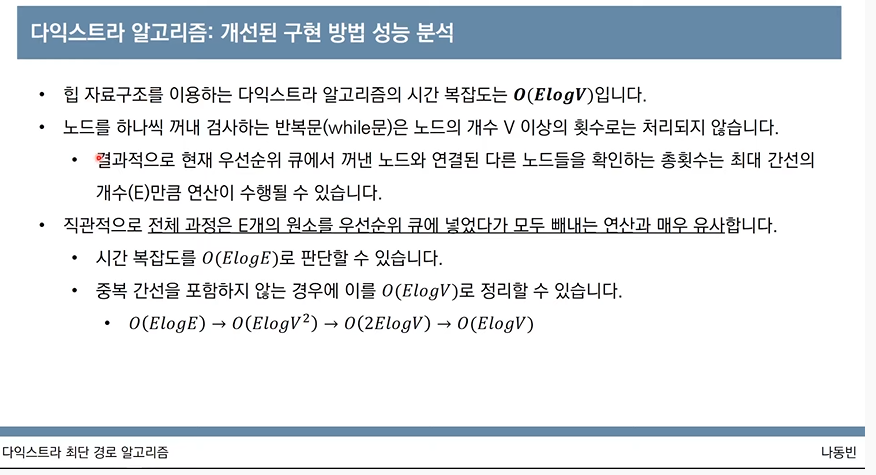